In [104]:
#Importing needed modules .
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers ,models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoder = LabelEncoder()
tokenizer = Tokenizer(oov_token='<00U00>')

In [105]:
#Reading csv file and getting 10 sample of that randomly .
file_directory = "D:\\datasets\\Logos\\file_mapping.csv"
file = read_csv(file_directory)
dataframe = file.copy()
dataframe.sample(10)

,Filename,Brand Name,Label,Tagline
393,output\Guinness\000003.jpg,Guinness,Genuine,Guinness is Good for You.
262,output\Nike\000002.jpg,Nike,Genuine,Just Do It.
808,output\Sprite\000005.jpg,Sprite,Genuine,Obey Your Thirst.
301,output\Pepsi\000004.jpg,Pepsi,Genuine,NaN
704,genLogoOutput\Bic\scal_000004.jpg,Bic,Fake,believe inward beach .
467,genLogoOutput\Android\scal_000004.jpg,Android,Fake,atomic_number_4 together . non the Same
253,genLogoOutput\Sprite\000003.jpg,Sprite,Fake,obey Your lust .
648,genLogoOutput\Netflix\scal_000005.jpg,Netflix,Fake,assure what ’ reciprocal_ohm succeeding
724,genLogoOutput\Peak milk\scal_000005.jpg,Peak milk,Fake,Everyone have_got antiophthalmic_factor eyeshade
566,output\Rolex\000003.jpg,Rolex,Genuine,A Crown for Every Achievement.


In [106]:
#Getting information from data frame .
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Filename    825 non-null    object
 1   Brand Name  825 non-null    object
 2   Label       825 non-null    object
 3   Tagline     813 non-null    object
dtypes: object(4)
memory usage: 25.9+ KB


In [107]:
#Dropping duplicated and null datas then Getting a new information from data frame .
dataframe = dataframe.drop_duplicates().dropna()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 824
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Filename    813 non-null    object
 1   Brand Name  813 non-null    object
 2   Label       813 non-null    object
 3   Tagline     813 non-null    object
dtypes: object(4)
memory usage: 31.8+ KB


In [108]:
#Seperating features and classes .
texts = dataframe.Tagline
labels = dataframe.Label
#Encoding classes to 0 and 1 .
encoded_lbl = encoder.fit_transform(labels).reshape(-1,1)

In [109]:
#Tokenizing reviews and creating a matrix from them .
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
matrix = pad_sequences(sequences,padding='post',truncating='post',maxlen=5)

In [110]:
#Seperating features and labels to train and valid .
xtr , xts , ytr , yts = train_test_split(matrix,encoded_lbl,test_size=0.1,random_state=12)

In [111]:
#Defining a model
model = models.Sequential([layers.Embedding(len(tokenizer.word_index),2,input_length=5),
                          layers.Flatten(),
                           layers.Dropout(0.2),
                          layers.Dense(1)])

In [112]:
#Compilation of the model .
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [113]:
#Datas train .
history = model.fit(xtr,ytr,epochs = 100,validation_data =(xts,yts))

Epoch 1/100
23/23 [==============================] - 1s 13ms/step - loss: 2.7893 - accuracy: 0.6731 - val_loss: 3.1074 - val_accuracy: 0.6098
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 1.9857 - accuracy: 0.6731 - val_loss: 2.4671 - val_accuracy: 0.6098
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 1.6882 - accuracy: 0.6731 - val_loss: 2.3697 - val_accuracy: 0.6098
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 1.5237 - accuracy: 0.6731 - val_loss: 2.0088 - val_accuracy: 0.6098
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 1.2200 - accuracy: 0.6731 - val_loss: 1.4769 - val_accuracy: 0.6098
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 1.0205 - accuracy: 0.6731 - val_loss: 1.1414 - val_accuracy: 0.6098
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.8567 - accuracy: 0.6731 - val_loss: 1.0849 - val_accuracy: 0.6098
Epoch 8/100


Epoch 59/100
23/23 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9754 - val_loss: 0.1295 - val_accuracy: 0.9756
Epoch 60/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0844 - accuracy: 0.9685 - val_loss: 0.1274 - val_accuracy: 0.9756
Epoch 61/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 0.9658 - val_loss: 0.1260 - val_accuracy: 0.9756
Epoch 62/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0789 - accuracy: 0.9713 - val_loss: 0.1240 - val_accuracy: 0.9878
Epoch 63/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.9795 - val_loss: 0.1211 - val_accuracy: 0.9878
Epoch 64/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0919 - accuracy: 0.9781 - val_loss: 0.1200 - val_accuracy: 0.9756
Epoch 65/100
23/23 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9781 - val_loss: 0.1189 - val_accuracy: 0.9756
Epoch 

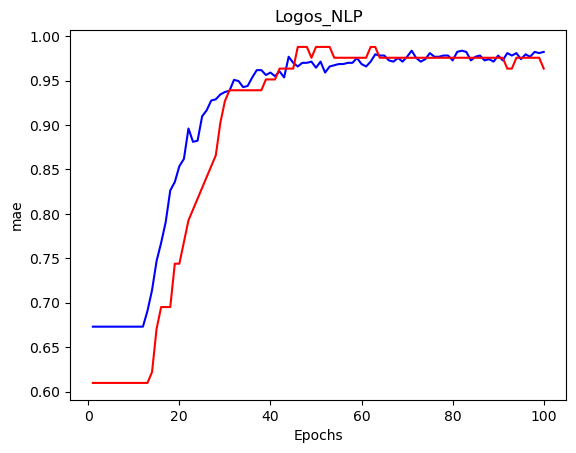

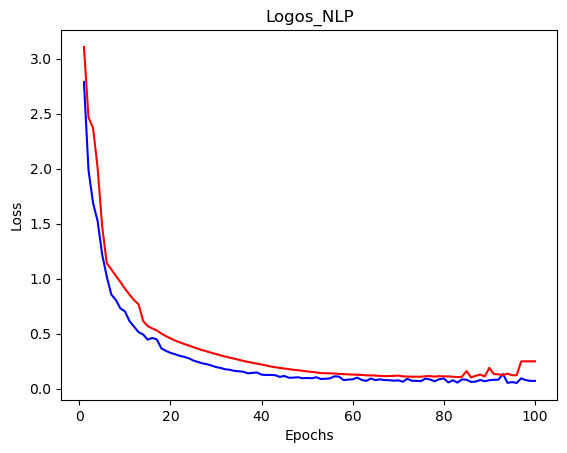

In [114]:
#Visualize models performance
epoch = range(1,101)
results = history.history
plt.plot(epoch,results['accuracy'],'blue')
plt.plot(epoch,results['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.title('Logos_NLP')
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Logos_NLP')
plt.show()